# "Top 5 European Leagues US Players Analysis"
> "Taking a look at statistics from the top 5 European football leagues and understanding US nationality player impact."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter, sports, LaLiga, data, analytics, football]
- image:
- hide: false
- search_exclude: true
- author: Parth Dholakia

It was about time that this blog takes a look at (non-American) football, and what better way than to take a look at the top 5 European leagues to see if we can understand how the US nationals are playing in comparison to everyone else. In order to do so, I pulled player based data from the following European football leagues (all data provided by Fbref.com):
* English Premier League
* German Bundesliga
* Spanish La Liga
* French Ligue 1
* Italian Serie A

Players are divided into 3 main categories (Forwards, Midfielders, and Defense), so I split my data into 3 groups in order to compare similar players. This could introduce some bias into the analysis as some defenders may play more like midfielders even though they're not listed as a midfielder. As Fbref lists players with multiple positions, we don't have to exclude these players from being compared in multiple roles. For example, Phil Foden of Manchester City is listed as both a Forward and a Midfielder, and as a result he will fall into both categories during comparison. 

In order to remove further bias from the statistics that we're comparing, we focused on statistics on a per 90 or percentage basis. This is to take into account the fact that players have varying totals of minutes played, and to standardize across the board for players who have played significantly more minutes than others. In addition, we've focused on players who have appeared in 15 matches or more to keep their data statistically significant.

The first group we're going to look at are all the forwards in the Top 5 leagues - you can examine the data by selecting a different league in the dropdown and clicking on individual player names as well. 

In [1]:
#hide
#standard(stats)
stats = ["player","nationality","position","squad","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
stats3 = ["players_used","possession","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"] 
#goalkeeping(keepers)
keepers = ["player","nationality","position","squad","age","birth_year","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
keepers3 = ["players_used","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
#advance goalkeeping(keepersadv)
keepersadv = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
keepersadv2 = ["minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
#shooting(shooting)
shooting = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting3 = ["goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
#passing(passing)
passing = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
#passtypes(passing_types)
passing_types = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
#goal and shot creation(gca)
gca = ["player","nationality","position","squad","age","birth_year","minutes_90s","sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
#defensive actions(defense)
defense = ["player","nationality","position","squad","age","birth_year","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
#possession(possession)
possession = ["player","nationality","position","squad","age","birth_year","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
#playingtime(playingtime)
playingtime = ["player","nationality","position","squad","age","birth_year","minutes_90s","games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
#miscallaneous(misc)
misc = ["player","nationality","position","squad","age","birth_year","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

In [2]:
#hide
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import sys, getopt
import csv
import matplotlib.pyplot as plt
from datetime import date
import os
from math import pi
import altair as alt
from altair import datum
from soccerplots.radar_chart import Radar

In [3]:
#hide
def get_tables(url):
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    team_table = all_tables[0]
    player_table = all_tables[1]
    return player_table, team_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player

def get_frame_team(features, team_table):
    pre_df_squad = dict()
    #Note: features does not contain squad name, it requires special treatment
    features_wanted_squad = features
    rows_squad = team_table.find_all('tr')
    for row in rows_squad:
        if(row.find('th',{"scope":"row"}) != None):
            name = row.find('th',{"data-stat":"squad"}).text.strip().encode().decode("utf-8")
            if 'squad' in pre_df_squad:
                pre_df_squad['squad'].append(name)
            else:
                pre_df_squad['squad'] = [name]
            for f in features_wanted_squad:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_squad:
                    pre_df_squad[f].append(text)
                else:
                    pre_df_squad[f] = [text]
    df_squad = pd.DataFrame.from_dict(pre_df_squad)
    return df_squad

def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_player = get_frame(features, player_table)
    return df_player

def frame_for_category_team(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_team = get_frame_team(features, team_table)
    return df_team

In [4]:
#hide
#Function to get the player data for outfield player, includes all categories - standard stats, shooting
#passing, passing types, goal and shot creation, defensive actions, possession, and miscallaneous
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats)
    df2 = frame_for_category('shooting',top,end,shooting2)
    df3 = frame_for_category('passing',top,end,passing2)
    df4 = frame_for_category('passing_types',top,end,passing_types2)
    df5 = frame_for_category('gca',top,end,gca2)
    df6 = frame_for_category('defense',top,end,defense2)
    df7 = frame_for_category('possession',top,end,possession2)
    df8 = frame_for_category('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [5]:
#hide
#Function to get keeping and advance goalkeeping data
def get_keeper_data(top,end):
    df1 = frame_for_category('keepers',top,end,keepers)
    df2 = frame_for_category('keepersadv',top,end,keepersadv2)
    df = pd.concat([df1, df2], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [9]:
#hide
#Function to get team-wise data accross all categories as mentioned above
def get_team_data(top,end):
    df1 = frame_for_category_team('stats',top,end,stats3)
    df2 = frame_for_category_team('keepers',top,end,keepers3)
    df3 = frame_for_category_team('keepersadv',top,end,keepersadv2)
    df4 = frame_for_category_team('shooting',top,end,shooting3)
    df5 = frame_for_category_team('passing',top,end,passing2)
    df6 = frame_for_category_team('passing_types',top,end,passing_types2)
    df7 = frame_for_category_team('gca',top,end,gca2)
    df8 = frame_for_category_team('defense',top,end,defense2)
    df9 = frame_for_category_team('possession',top,end,possession2)
    df10 = frame_for_category_team('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [10]:
#hide
#This cell is to get the outfield player data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
today = date.today()
path = '/Users/parthdholakia/Code/first-python-notebook/SoccerStats'

df_englishoutfield = get_outfield_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')
os.chdir(path)
df_englishoutfield.to_csv(str(today) + "PremierLeagueOutfieldPlayers.csv", index=False, encoding='utf-8-sig')
df_englishoutfield["League"] = "English Premier League"

df_frenchoutfield = get_outfield_data('https://fbref.com/en/comps/13/','/Ligue-1-Stats')
os.chdir(path)
df_frenchoutfield.to_csv(str(today) + "FrenchLigue1OutfieldPlayers.csv", index=False, encoding='utf-8-sig')
df_frenchoutfield["League"] = "French Ligue 1"

df_germanoutfield = get_outfield_data('https://fbref.com/en/comps/20/','/Bundesliga-Stats')
os.chdir(path)
df_germanoutfield.to_csv(str(today) + "BundesligaOutfieldPlayers.csv", index=False, encoding='utf-8-sig')
df_germanoutfield["League"] = "German Bundesliga"

df_italianoutfield = get_outfield_data('https://fbref.com/en/comps/11/','/Serie-A-Stats')
os.chdir(path)
df_italianoutfield.to_csv(str(today) + "SerieAOutfieldPlayers.csv", index=False, encoding='utf-8-sig')
df_italianoutfield["League"] = "Italian Serie A"

df_spanishoutfield = get_outfield_data('https://fbref.com/en/comps/12/','/La-Liga-Stats')
os.chdir(path)
df_spanishoutfield.to_csv(str(today) + "LaLigaOutfieldPlayers.csv", index=False, encoding='utf-8-sig')
df_spanishoutfield["League"] = "Spanish La Liga"

AttributeError: 'NoneType' object has no attribute 'text'

In [12]:
path = '/Users/parthdholakia/Code/first-python-notebook/SoccerStats'
os.chdir(path)
df_englishoutfield = pd.read_csv('2021-03-04PremierLeagueOutfieldPlayers.csv')
df_frenchoutfield = pd.read_csv('2021-03-04FrenchLigue1OutfieldPlayers.csv')
df_germanoutfield = pd.read_csv('2021-03-04BundesligaOutfieldPlayers.csv')
df_italianoutfield = pd.read_csv('2021-03-04SerieAOutfieldPlayers.csv')
df_spanishoutfield = pd.read_csv('2021-03-04LaLigaOutfieldPlayers.csv')
df_englishoutfield["League"] = "English Premier League"
df_frenchoutfield["League"] = "French Ligue 1"
df_germanoutfield["League"] = "German Bundesliga"
df_italianoutfield["League"] = "Italian Serie A"
df_spanishoutfield["League"] = "Spanish La Liga"

In [13]:
#hide
Top5append = df_englishoutfield.append([df_frenchoutfield, df_germanoutfield, df_italianoutfield, df_spanishoutfield])

Top5append = Top5append.reset_index().drop(columns = ["index"])

Top5append["tackles_won_pct"] = Top5append["tackles_won"] / Top5append["tackles"]
Top5append["tackles_att_3rd_per90"] = Top5append["tackles_att_3rd"] / Top5append["minutes"] * 90
Top5append["pressures_att_3rd_per90"] = Top5append["pressures_att_3rd"] / Top5append["minutes"] * 90
Top5append["fouled_per90"] = Top5append["fouled"] / Top5append["minutes"] * 90
Top5append["carries_into_penalty_area_per90"] = Top5append["carries_into_penalty_area"] / Top5append["minutes"] * 90
Top5append["carries_into_final_third_per90"] = Top5append["carries_into_final_third"] / Top5append["minutes"] * 90
Top5append["passes_into_final_third_per90"] = Top5append["passes_into_final_third"] / Top5append["minutes"] * 90
Top5append["passes_into_penalty_area_per90"] = Top5append["passes_into_penalty_area"] / Top5append["minutes"] * 90
Top5append["crosses_into_penalty_area_per90"] = Top5append["crosses_into_penalty_area"] / Top5append["minutes"] * 90
Top5append["progressive_passes_per90"] = Top5append["progressive_passes"] / Top5append["minutes"] * 90
Top5append["through_balls_per90"] = Top5append["through_balls"] / Top5append["minutes"] * 90
Top5append["interceptions_per90"] = Top5append["interceptions"] / Top5append["minutes"] * 90
Top5append["dispossessed_per90"] = Top5append["dispossessed"] / Top5append["minutes"] * 90
Top5append["tackles_per90"] = Top5append["tackles"] / Top5append["minutes"] * 90
Top5append["dribbled_past_per90"] = Top5append["dribbled_past"] / Top5append["minutes"] * 90
Top5append["blocked_shots_per90"] = Top5append["blocked_shots"] / Top5append["minutes"] * 90
Top5append["errors_per90"] = Top5append["errors"] / Top5append["minutes"] * 90
Top5append["progressive_carries_per90"] = Top5append["progressive_carries"] / Top5append["minutes"] * 90
Top5append["miscontrols_per90"] = Top5append["miscontrols"] / Top5append["minutes"] * 90

Top5filtered = Top5append[Top5append["games"] > 15]

Top5filtered = Top5filtered.reset_index().drop(columns = ["index"])

In [14]:
#hide
FWcolumns = ["player",
             "nationality",
             "League",
             "games",
             "position",
             "age",
            "goals_pens_per90",
             "npxg_per90",
             "npxg_xa_per90",
             "shots_on_target_pct",
             "shots_on_target_per90",
             "goals_per_shot_on_target",
             "sca_per90",
             "gca_per90",
             "tackles_att_3rd_per90",
             "pressures_att_3rd_per90",
             "pressure_regain_pct",
             "dribbles_completed_pct",
             "aerials_won_pct",
             "fouled_per90",
             "carries_into_final_third_per90",
             "carries_into_penalty_area_per90"
            ]

MFcolumns = ["player",
             "nationality",
             "League",
             "games",
             "position",
             "age",
             "goals_pens_per90",
             "assists_per90",
             "npxg_per90",
             "xa_per90",
             "passes_pct",
             "passes_pct_medium",
             "passes_pct_long",
             "passes_into_final_third_per90",
             "passes_into_penalty_area_per90",
             "crosses_into_penalty_area_per90",
             "progressive_passes_per90",
             "through_balls_per90",
             "pressure_regain_pct",
             "interceptions_per90",
             "dribbles_completed_pct",
             "fouled_per90",
             "dispossessed_per90",
             "tackles_per90",
             "tackles_won_pct",
             "carries_into_final_third_per90",
             "carries_into_penalty_area_per90"
]

DFcolumns = ["player",
             "nationality",
             "League",
             "games",
             "position",
             "age",
             "cards_yellow",
             "assists_per90",
             "xa_per90",
             "passes_pct",
             "passes_into_final_third_per90",
             "passes_into_penalty_area_per90",
             "crosses_into_penalty_area_per90",
             "tackles_per90",
             "tackles_won_pct",
             "dribbled_past_per90",
             "blocked_shots_per90",
             "interceptions_per90",
             "errors_per90",
             "progressive_carries_per90",
             "dispossessed_per90",
             "miscontrols_per90",
             "aerials_won_pct"
]

In [15]:
#hide
Top5FW = Top5filtered[Top5filtered["position"].str.contains("FW")].reset_index().drop(columns = ["index"])
Top5MF = Top5filtered[Top5filtered["position"].str.contains("MF")].reset_index().drop(columns = ["index"])
Top5DF = Top5filtered[Top5filtered["position"].str.contains("DF")].reset_index().drop(columns = ["index"])
Top5FW = Top5FW[FWcolumns]
Top5MF = Top5MF[MFcolumns]
Top5DF = Top5DF[DFcolumns]
Top5FW["age"] = Top5FW["age"].str[:2]
Top5MF["age"] = Top5MF["age"].str[:2]
Top5DF["age"] = Top5DF["age"].str[:2]
Top5FW["age"] = Top5FW["age"].apply(pd.to_numeric, errors = "coerce")
Top5MF["age"] = Top5MF["age"].apply(pd.to_numeric, errors = "coerce")
Top5DF["age"] = Top5DF["age"].apply(pd.to_numeric, errors = "coerce")

In [16]:
#hide
Top5FW["goals_pens_per90_rank"] = Top5FW.goals_pens_per90.rank(pct = True)
Top5FW["npxg_per90_rank"] = Top5FW.npxg_per90.rank(pct = True)
Top5FW["npxg_xa_per90_rank"] = Top5FW.npxg_xa_per90.rank(pct = True)
Top5FW["shots_on_target_pct_rank"] = Top5FW.shots_on_target_pct.rank(pct = True)
Top5FW["shots_on_target_per90_rank"] = Top5FW.shots_on_target_per90.rank(pct = True)
Top5FW["goals_per_shot_on_target_rank"] = Top5FW.goals_per_shot_on_target.rank(pct = True)
Top5FW["sca_per90_rank"] = Top5FW.sca_per90.rank(pct = True)
Top5FW["gca_per90_rank"] = Top5FW.gca_per90.rank(pct = True)
Top5FW["tackles_att_3rd_per90_rank"] = Top5FW.tackles_att_3rd_per90.rank(pct = True)
Top5FW["pressures_att_3rd_per90_rank"] = Top5FW.pressures_att_3rd_per90.rank(pct = True)
Top5FW["pressure_regain_pct_rank"] = Top5FW.pressure_regain_pct.rank(pct = True)
Top5FW["dribbles_completed_pct_rank"] = Top5FW.dribbles_completed_pct.rank(pct = True)
Top5FW["aerials_won_pct_rank"] = Top5FW.aerials_won_pct.rank(pct = True)
Top5FW["fouled_per90_rank"] = Top5FW.fouled_per90.rank(pct = True)
Top5FW["carries_into_final_third_per90_rank"] = Top5FW.carries_into_final_third_per90.rank(pct = True)
Top5FW["carries_into_penalty_area_per90_rank"] = Top5FW.carries_into_penalty_area_per90.rank(pct = True)
Top5MF["goals_pens_per90_rank"] = Top5MF.goals_pens_per90.rank(pct = True)
Top5MF["assists_per90_rank"] = Top5MF.assists_per90.rank(pct = True)
Top5MF["npxg_per90_rank"] = Top5MF.npxg_per90.rank(pct = True)
Top5MF["xa_per90_rank"] = Top5MF.xa_per90.rank(pct = True)
Top5MF["passes_pct_rank"] = Top5MF.passes_pct.rank(pct = True)
Top5MF["passes_pct_medium_rank"] = Top5MF.passes_pct_medium.rank(pct = True)
Top5MF["passes_pct_long_rank"] = Top5MF.passes_pct_long.rank(pct = True)
Top5MF["passes_into_final_third_per90_rank"] = Top5MF.passes_into_final_third_per90.rank(pct = True)
Top5MF["passes_into_penalty_area_per90_rank"] = Top5MF.passes_into_penalty_area_per90.rank(pct = True)
Top5MF["crosses_into_penalty_area_per90_rank"] = Top5MF.crosses_into_penalty_area_per90.rank(pct = True)
Top5MF["progressive_passes_per90_rank"] = Top5MF.progressive_passes_per90.rank(pct = True)
Top5MF["through_balls_per90_rank"] = Top5MF.through_balls_per90.rank(pct = True)
Top5MF["pressure_regain_pct_rank"] = Top5MF.pressure_regain_pct.rank(pct = True)
Top5MF["interceptions_per90_rank"] = Top5MF.interceptions_per90.rank(pct = True)
Top5MF["dribbles_completed_pct_rank"] = Top5MF.dribbles_completed_pct.rank(pct = True)
Top5MF["fouled_per90_rank"] = Top5MF.fouled_per90.rank(pct = True)
Top5MF["dispossessed_per90_rank"] = Top5MF.dispossessed_per90.rank(pct = True)
Top5MF["tackles_per90_rank"] = Top5MF.tackles_per90.rank(pct = True)
Top5MF["tackles_won_pct_rank"] = Top5MF.tackles_won_pct.rank(pct = True)
Top5MF["carries_into_final_third_per90_rank"] = Top5MF.carries_into_final_third_per90.rank(pct = True)
Top5MF["carries_into_penalty_area_per90_rank"] = Top5MF.carries_into_penalty_area_per90.rank(pct = True)
Top5DF["assists_per90_rank"] = Top5DF.assists_per90.rank(pct = True)
Top5DF["xa_per90_rank"] = Top5DF.xa_per90.rank(pct = True)
Top5DF["passes_pct_rank"] = Top5DF.passes_pct.rank(pct = True)
Top5DF["passes_into_final_third_per90_rank"] = Top5DF.passes_into_final_third_per90.rank(pct = True)
Top5DF["passes_into_penalty_area_per90_rank"] = Top5DF.passes_into_penalty_area_per90.rank(pct = True)
Top5DF["crosses_into_penalty_area_per90_rank"] = Top5DF.crosses_into_penalty_area_per90.rank(pct = True)
Top5DF["tackles_per90_rank"] = Top5DF.tackles_per90.rank(pct = True)
Top5DF["tackles_won_pct_rank"] = Top5DF.tackles_won_pct.rank(pct = True)
Top5DF["dribbled_past_per90_rank"] = Top5DF.dribbled_past_per90.rank(pct = True)
Top5DF["blocked_shots_per90_rank"] = Top5DF.blocked_shots_per90.rank(pct = True)
Top5DF["interceptions_per90_rank"] = Top5DF.interceptions_per90.rank(pct = True)
Top5DF["errors_per90_rank"] = Top5DF.errors_per90.rank(pct = True)
Top5DF["progressive_carries_per90_rank"] = Top5DF.progressive_carries_per90.rank(pct = True)
Top5DF["dispossessed_per90_rank"] = Top5DF.dispossessed_per90.rank(pct = True)
Top5DF["miscontrols_per90_rank"] = Top5DF.miscontrols_per90.rank(pct = True)
Top5DF["aerials_won_pct_rank"] = Top5DF.aerials_won_pct.rank(pct = True)

In [ ]:
#hide
#Top5YoungFW = Top5FW[Top5FW["age"] < 23]
#Top5YoungMF = Top5MF[Top5MF["age"] < 23]
#Top5YoungDF = Top5DF[Top5DF["age"] < 23]

In [17]:
#hide
Top5FWUSA = Top5FW[Top5FW["nationality"].str.contains("USA")]
Top5MFUSA = Top5MF[Top5MF["nationality"].str.contains("USA")]
Top5DFUSA = Top5DF[Top5DF["nationality"].str.contains("USA")]

In [18]:
#hide
Top5FWUSA.loc['mean'] = Top5FWUSA.mean()
Top5MFUSA.loc['mean'] = Top5MFUSA.mean()
Top5DFUSA.loc['mean'] = Top5DFUSA.mean()

/Users/parthdholakia/.local/share/virtualenvs/first-python-notebook-93uvSfJl/lib/python3.8/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
#hide
Top5FWUSA["player"].fillna("mean", inplace = True)
Top5MFUSA["player"].fillna("mean", inplace = True)
Top5DFUSA["player"].fillna("mean", inplace = True)

/Users/parthdholakia/.local/share/virtualenvs/first-python-notebook-93uvSfJl/lib/python3.8/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
#hide
Top5FW.loc['mean'] = Top5FW.mean()
Top5MF.loc['mean'] = Top5MF.mean()
Top5DF.loc['mean'] = Top5DF.mean()

In [21]:
#hide
Top5FW["player"].fillna("mean", inplace = True)
Top5MF["player"].fillna("mean", inplace = True)
Top5DF["player"].fillna("mean", inplace = True)

In [22]:
#hide_input

leagues = Top5FW["League"].unique()

hover = alt.selection_single(
    on='mouseover',  # select on mouseover
    nearest=True,    # select nearest point to mouse cursor
    empty='none'     # empty selection should match nothing
)

click = alt.selection_multi(
    empty='none' # empty selection matches no points
)

selectLeague = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['League'], # limit selection to the Major_Genre field
    init={'League': leagues[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=leagues) # bind to a menu of unique genre values
)

rule1 = alt.Chart(Top5FW).mark_rule(color = "blue").encode(
    x = "mean(dribbles_completed_pct):Q"
)

rule2 = alt.Chart(Top5FW).mark_rule(color = "blue").encode(
    y = "mean(goals_pens_per90):Q"
)

# scatter plot encodings shared by all marks
plot = alt.Chart(Top5FW).mark_circle().encode(
    x=alt.X('dribbles_completed_pct:Q', axis = alt.Axis(title = "Dribbles Completed %")),
    y=alt.Y('goals_pens_per90:Q',axis = alt.Axis(title = "Non Penalty Goals Per 90")),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
).properties(
    title = "Top 5 Leagues: Forwards"
)

plot2 = alt.Chart(Top5FWUSA).mark_circle().encode(
    x = "dribbles_completed_pct:Q",
    y = "goals_pens_per90:Q",
    color = alt.value("red"),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)

#plot3 = alt.Chart(Top5YoungFW).mark_circle().encode(
#    x = "dribbles_completed_pct:Q",
#    y = "goals:Q",
#    color = alt.value("orange"),
#    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
#)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)
    
    
# shared base for new layers
base = plot.transform_filter(
    hover | click # filter to points in either selection
)

# layer scatter plot points, halo annotations, and title labels
alt.layer(
    plot.add_selection(hover).add_selection(click).add_selection(selectLeague),
    base.mark_point(size=100, stroke='firebrick', strokeWidth=1),
    base.mark_text(dx=4, dy=-8, align='right', stroke='white', strokeWidth=2).encode(text='player:N'),
    base.mark_text(dx=4, dy=-8, align='right').encode(text='player:N'),
    rule1,
    rule2,
    plot2,
    data=Top5FW
).properties(
    width=600,
    height=450
)

alt.LayerChart(...)

Throughout all of the charts - we've highlighted US nationals in red to understand where they fall in comparison to the rest of the players. In addition, the blue lines indicate the mean for each statistic. 466 forwards across the 5 leagues qualified to be compared. 

The above chart helps us identify the forwards that complete a high rate of dribbles and score non-penalty goals. As we can see, Luis Muriel of Atalanta scores over 1.4 goals per 90, but is a below average dribbler. In contrast, Ridle Baku of Atletico Madrid completes almost 90% of dribbles but doesn't score much at all. 

Erling Haaland of Borussia Dortmund is the best at both - managing to keep control of over 70% of dribbles while scoring almost 1 non-penalty goal a game, truly a game changer on the field. 

US forwards don't perform well compared to the remainder of the field here - you can see they fall in the middle of the pack. Christian Pulisic in particular is below average in both categories. Gio Reyna and Josh Sargent, despite being young, are completing more dribbles than the average forward. 

In the next chart, we'll take a look at the same forward group across different statistics. 


In [24]:
#hide_input

leagues = Top5FW["League"].unique()

hover = alt.selection_single(
    on='mouseover',  # select on mouseover
    nearest=True,    # select nearest point to mouse cursor
    empty='none'     # empty selection should match nothing
)

click = alt.selection_multi(
    empty='none' # empty selection matches no points
)

selectLeague = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['League'], # limit selection to the Major_Genre field
    init={'League': leagues[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=leagues) # bind to a menu of unique genre values
)

rule1 = alt.Chart(Top5FW).mark_rule(color = "blue").encode(
    x = "mean(pressure_regain_pct):Q"
)

rule2 = alt.Chart(Top5FW).mark_rule(color = "blue").encode(
    y = "mean(gca_per90):Q"
)

# scatter plot encodings shared by all marks
plot = alt.Chart(Top5FW).mark_circle().encode(
    x=alt.X('pressure_regain_pct:Q', axis = alt.Axis(title = "Pressure Regain %")),
    y=alt.Y('gca_per90:Q',axis = alt.Axis(title = "Goal Creating Actions Per 90")),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
).properties(
    title = "Top 5 Leagues: Forwards"
)

plot2 = alt.Chart(Top5FWUSA).mark_circle().encode(
    x = "pressure_regain_pct:Q",
    y = "gca_per90:Q",
    color = alt.value("red"),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)

#plot3 = alt.Chart(Top5YoungFW).mark_circle().encode(
#    x = "dribbles_completed_pct:Q",
#    y = "goals:Q",
#    color = alt.value("orange"),
#    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
#)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)
    
    
# shared base for new layers
base = plot.transform_filter(
    hover | click # filter to points in either selection
)

# layer scatter plot points, halo annotations, and title labels
alt.layer(
    plot.add_selection(hover).add_selection(click).add_selection(selectLeague),
    base.mark_point(size=100, stroke='firebrick', strokeWidth=1),
    base.mark_text(dx=4, dy=-8, align='right', stroke='white', strokeWidth=2).encode(text='player:N'),
    base.mark_text(dx=4, dy=-8, align='right').encode(text='player:N'),
    rule1,
    rule2,
    plot2,
    data=Top5FW
).properties(
    width=600,
    height=450
)

alt.LayerChart(...)

Liverpool has popularized the gegenpressing style of football, and as a result many more teams are switching to play that way. The above chart aims to understand which players recover the ball well and are able to create goals as a result. Given that teams depend on forwards to make key decisions in the final third and ultimately create goals, we thought it would be interesting to compare forwards in this manner. A goal creating action can be any live-ball passes, dead-ball passes, successful dribbles, or shots that lead to a goal. 

Here, we see that Americans show slightly better than before. In particular, Christian Pulisic is above average in both categories. Despite being just 18 years old, Gio Reyna clearly stands out as one of the best at regaining the ball when putting defenders under pressure. In addition, he's directly contributing to the score sheet with almost 0.6 goal creating actions per 90. 

Let's take a look at the midfielders next:


In [25]:
#hide_input

leagues = Top5MF["League"].unique()

hover = alt.selection_single(
    on='mouseover',  # select on mouseover
    nearest=True,    # select nearest point to mouse cursor
    empty='none'     # empty selection should match nothing
)

click = alt.selection_multi(
    empty='none' # empty selection matches no points
)

selectLeague = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['League'], # limit selection to the Major_Genre field
    init={'League': leagues[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=leagues) # bind to a menu of unique genre values
)

rule1 = alt.Chart(Top5MF).mark_rule(color = "blue").encode(
    x = "mean(passes_into_penalty_area_per90):Q"
)

rule2 = alt.Chart(Top5MF).mark_rule(color = "blue").encode(
    y = "mean(tackles_won_pct):Q"
)

# scatter plot encodings shared by all marks
plot = alt.Chart(Top5MF).mark_circle().encode(
    x=alt.X('passes_into_penalty_area_per90:Q' , axis = alt.Axis(title = "Passes into the penalty area per 90")),
    y=alt.Y('tackles_won_pct:Q' , axis = alt.Axis(title = "Tackle Win %")) , 
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
).properties(
    title = "Top 5 Leagues: Midfielders"
)

plot2 = alt.Chart(Top5MFUSA).mark_circle().encode(
    x = "passes_into_penalty_area_per90:Q",
    y = "tackles_won_pct:Q",
    color = alt.value("red"),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)
    
    
# shared base for new layers
base = plot.transform_filter(
    hover | click # filter to points in either selection
)

# layer scatter plot points, halo annotations, and title labels
alt.layer(
    plot.add_selection(hover).add_selection(click).add_selection(selectLeague),
    base.mark_point(size=100, stroke='firebrick', strokeWidth=1),
    base.mark_text(dx=4, dy=-8, align='right', stroke='white', strokeWidth=2).encode(text='player:N'),
    base.mark_text(dx=4, dy=-8, align='right').encode(text='player:N'),
    rule1,
    rule2,
    plot2,
    data=Top5MF
).properties(
    width=600,
    height=450
)

alt.LayerChart(...)

Midfielders arguably have the most responsibilities on the pitch, so we'll take a look at a couple different statistics to understand who stands out as the best performers. We'll see some overalap between players on the Midfielders and Forwards list. 619 players across the top 5 leagues qualified to be compared in this group. 

US players have a slightly mixed bag here. Christian Pulisic is one of the best performers in getting the ball to teammates in the penalty area, but is underwhelming when completing tackles. Once again, Gio Reyna outperforms the average in both categories, and is tackling at almost a 80% win rate while getting 1.8 passes into the penalty area, per 90. 

Weston Mckinnie is another American national to discuss, especially given his recent signing by Juventus. He's performing slightly better than the mean in both categories. 

Let's take a look at some other ways that midfielders contribute on the pitch. 

In [27]:
#hide_input

leagues = Top5MF["League"].unique()

hover = alt.selection_single(
    on='mouseover',  # select on mouseover
    nearest=True,    # select nearest point to mouse cursor
    empty='none'     # empty selection should match nothing
)

click = alt.selection_multi(
    empty='none' # empty selection matches no points
)

selectLeague = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['League'], # limit selection to the Major_Genre field
    init={'League': leagues[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=leagues) # bind to a menu of unique genre values
)

rule1 = alt.Chart(Top5MF).mark_rule(color = "blue").encode(
    x = "mean(carries_into_penalty_area_per90):Q"
)

rule2 = alt.Chart(Top5MF).mark_rule(color = "blue").encode(
    y = "mean(crosses_into_penalty_area_per90):Q"
)

# scatter plot encodings shared by all marks
plot = alt.Chart(Top5MF).mark_circle().encode(
    x=alt.X('carries_into_penalty_area_per90:Q' , axis = alt.Axis(title = "Carries into the penalty area per 90")),
    y=alt.Y('crosses_into_penalty_area_per90:Q' , axis = alt.Axis(title = "Crosses into the penalty area per 90")) , 
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
).properties(
    title = "Top 5 Leagues: Midfielders"
)

plot2 = alt.Chart(Top5MFUSA).mark_circle().encode(
    x = "carries_into_penalty_area_per90:Q",
    y = "crosses_into_penalty_area_per90:Q",
    color = alt.value("red"),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)
    
    
# shared base for new layers
base = plot.transform_filter(
    hover | click # filter to points in either selection
)

# layer scatter plot points, halo annotations, and title labels
alt.layer(
    plot.add_selection(hover).add_selection(click).add_selection(selectLeague),
    base.mark_point(size=100, stroke='firebrick', strokeWidth=1),
    base.mark_text(dx=4, dy=-8, align='right', stroke='white', strokeWidth=2).encode(text='player:N'),
    base.mark_text(dx=4, dy=-8, align='right').encode(text='player:N'),
    rule1,
    rule2,
    plot2,
    data=Top5MF
).properties(
    width=600,
    height=450
)

alt.LayerChart(...)

This chart is slightly polarizing, but is a good indication of the variability amongst midfielders. Depending on team makeup and shape, midfielders may stay out wide to focus on crossing the ball to strikers, while other wide midfielders cut in with the ball to carry into the penalty area and find a clinical finish. Jack Grealish is able to carry the ball into the area an astonishingly 3.4 times per 90, far outpacing anyone else in Europe. Meanwhile, Pedro Leon is successfully crossing the ball into the box 1.5 times per 90. 

Kingsley Coman is one of the few players who is succesfully able to do both, highlighting his incredible technique on the dribble and when crossing the ball. Sheraldo Becker of Union Berlin is performing at approximately the same level as Kingsley Coman. 

US midfielders don't seem to cross the ball too often, or they're not very successful when attempting it. Both Pulisic and Reyna carry the ball approximately 2 times per 90, which is far above the average across the top 5 leagues. Surprisingly, Weston Mckinnie isn't successful in doing either - maybe because of his role on Juventus?


In [28]:
#hide_input

leagues = Top5MF["League"].unique()

hover = alt.selection_single(
    on='mouseover',  # select on mouseover
    nearest=True,    # select nearest point to mouse cursor
    empty='none'     # empty selection should match nothing
)

click = alt.selection_multi(
    empty='none' # empty selection matches no points
)

selectLeague = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['League'], # limit selection to the Major_Genre field
    init={'League': leagues[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=leagues) # bind to a menu of unique genre values
)

rule1 = alt.Chart(Top5MF).mark_rule(color = "blue").encode(
    x = "mean(npxg_per90):Q"
)

rule2 = alt.Chart(Top5MF).mark_rule(color = "blue").encode(
    y = "mean(interceptions_per90):Q"
)

# scatter plot encodings shared by all marks
plot = alt.Chart(Top5MF).mark_circle().encode(
    x=alt.X('npxg_per90:Q' , axis = alt.Axis(title = "Non penalty expected goals per 90")),
    y=alt.Y('interceptions_per90:Q' , axis = alt.Axis(title = "Interceptions per 90")) , 
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
).properties(
    title = "Top 5 Leagues: Midfielders"
)

plot2 = alt.Chart(Top5MFUSA).mark_circle().encode(
    x = "npxg_per90:Q",
    y = "interceptions_per90:Q",
    color = alt.value("red"),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)
    
    
# shared base for new layers
base = plot.transform_filter(
    hover | click # filter to points in either selection
)

# layer scatter plot points, halo annotations, and title labels
alt.layer(
    plot.add_selection(hover).add_selection(click).add_selection(selectLeague),
    base.mark_point(size=100, stroke='firebrick', strokeWidth=1),
    base.mark_text(dx=4, dy=-8, align='right', stroke='white', strokeWidth=2).encode(text='player:N'),
    base.mark_text(dx=4, dy=-8, align='right').encode(text='player:N'),
    rule1,
    rule2,
    plot2,
    data=Top5MF
).properties(
    width=600,
    height=450
)

alt.LayerChart(...)

Last look at midfielders! This chart is also slightly indicative of the variability within midfielders. Defensive players will likely perform well in intercepting the ball due to better positioning, while attacking midfielders and wingers will likely perform better in expected goals per 90. 

Interestingly enough, there are a few players who do both well. Despite being 18 years old, Jamal Musiala is performing well in both categories, a great sign for the future of the Bayern youngster. Surprisingly, Adrien Hunou of Stade Rennes is outperforming Lionel Messi in non penalty expected goals per 90. 

For the US players, there's some change here which is slightly surprising. Young Lille player, Timothy Weah, is one of the leading midfielders in Europe in non penalty expected goals per 90. Gio Reyna does not perform as well as in some of the previous, which may be an indication that his sweet spot is in being the creative outlet for his Dortmund side. 

Tyler Adams is another American of note on this chart - outperforming the average when interception opposition passes.

Moving on to defenders, let's take a look and who's effective at the back while also contributing to the attack. 

In [30]:
#hide_input

leagues = Top5DF["League"].unique()

hover = alt.selection_single(
    on='mouseover',  # select on mouseover
    nearest=True,    # select nearest point to mouse cursor
    empty='none'     # empty selection should match nothing
)

click = alt.selection_multi(
    empty='none' # empty selection matches no points
)

selectLeague = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['League'], # limit selection to the Major_Genre field
    init={'League': leagues[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=leagues) # bind to a menu of unique genre values
)

rule1 = alt.Chart(Top5DF).mark_rule(color = "blue").encode(
    x = "mean(tackles_won_pct):Q"
)

rule2 = alt.Chart(Top5DF).mark_rule(color = "blue").encode(
    y = "mean(passes_into_penalty_area_per90):Q"
)

# scatter plot encodings shared by all marks
plot = alt.Chart(Top5DF).mark_circle().encode(
    x=alt.X('tackles_won_pct:Q' , axis = alt.Axis(title = "Tackle Win %")),
    y=alt.Y('passes_into_penalty_area_per90:Q' , axis = alt.Axis(title = "Passes into penalty area per 90")) , 
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
).properties(
    title = "Top 5 Leagues: Defenders"
)

plot2 = alt.Chart(Top5DFUSA).mark_circle().encode(
    x = "tackles_won_pct:Q",
    y = "passes_into_penalty_area_per90:Q",
    color = alt.value("red"),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)
    
    
# shared base for new layers
base = plot.transform_filter(
    hover | click # filter to points in either selection
)

# layer scatter plot points, halo annotations, and title labels
alt.layer(
    plot.add_selection(hover).add_selection(click).add_selection(selectLeague),
    base.mark_point(size=100, stroke='firebrick', strokeWidth=1),
    base.mark_text(dx=4, dy=-8, align='right', stroke='white', strokeWidth=2).encode(text='player:N'),
    base.mark_text(dx=4, dy=-8, align='right').encode(text='player:N'),
    rule1,
    rule2,
    plot2,
    data=Top5DF
).properties(
    width=600,
    height=450
)

alt.LayerChart(...)

Few defenders are able to pass precisely into the penalty area while also successfully tackling at a high percentage. From an American perspective, Sergino Dest and Antonee Robinson are passing the ball extremely well into the penalty area, but they're not tackling well above the average tackling win percentage. 

In [31]:
#hide_input

leagues = Top5DF["League"].unique()

hover = alt.selection_single(
    on='mouseover',  # select on mouseover
    nearest=True,    # select nearest point to mouse cursor
    empty='none'     # empty selection should match nothing
)

click = alt.selection_multi(
    empty='none' # empty selection matches no points
)

selectLeague = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['League'], # limit selection to the Major_Genre field
    init={'League': leagues[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=leagues) # bind to a menu of unique genre values
)

rule1 = alt.Chart(Top5DF).mark_rule(color = "blue").encode(
    x = "mean(errors_per90):Q"
)

rule2 = alt.Chart(Top5DF).mark_rule(color = "blue").encode(
    y = "mean(progressive_carries_per90):Q"
)

# scatter plot encodings shared by all marks
plot = alt.Chart(Top5DF).mark_circle().encode(
    x=alt.X('errors_per90:Q' , axis = alt.Axis(title = "Errors Per 90")),
    y=alt.Y('progressive_carries_per90:Q' , axis = alt.Axis(title = "Progressive Carries per 90")) , 
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
).properties(
    title = "Top 5 Leagues: Defenders"
)

plot2 = alt.Chart(Top5DFUSA).mark_circle().encode(
    x = "errors_per90:Q",
    y = "progressive_carries_per90:Q",
    color = alt.value("red"),
    opacity=alt.condition(selectLeague, alt.value(0.8), alt.value(0.15))
)
#.transform_filter(
#   alt.FieldEqualPredicate(field = "Player" , equal = "LaMelo Ball")
#)
    
    
# shared base for new layers
base = plot.transform_filter(
    hover | click # filter to points in either selection
)

# layer scatter plot points, halo annotations, and title labels
alt.layer(
    plot.add_selection(hover).add_selection(click).add_selection(selectLeague),
    base.mark_point(size=100, stroke='firebrick', strokeWidth=1),
    base.mark_text(dx=4, dy=-8, align='right', stroke='white', strokeWidth=2).encode(text='player:N'),
    base.mark_text(dx=4, dy=-8, align='right').encode(text='player:N'),
    rule1,
    rule2,
    plot2,
    data=Top5DF
).properties(
    width=600,
    height=450
)

alt.LayerChart(...)

As a defender, an error can be extremely costly for the team, often resulting in a goal against. The Americans have solid representation with Tyler Adams, Sergino Dest, and Antonee Robinson all registering 0 errors and over 5 progressive carries per 90. Hoever, John Brooks is commiting an above average rate of errors amongst defenders in the top 5. 

Taking a look at this data through scatterplots doesn't give us a direct comparison to see how US players are performing against the rest of the world. In order to achieve this, I wanted to explore radar charts to see if they provided a clearer picture of how Americans are performing in the top 5. 

Let's keep in mind - there are only 4 Americans that qualify to be a part of the forwards dataset, out of 466. This is definitely not significant enough to be representative of American talent in the top 5, but nevertheless this is quite interesting to see. The American forwards perform better than average in two main areas:
* Carrying the ball into the penalty area
* Regaining the ball when pressuring defenders

However, American forwards aren't performing better at scoring and creating goals.

In [67]:
#hide
FWradar = Top5FW.loc[: , ["player", 
            "goals_pens_per90",
             "npxg_xa_per90",
             "shots_on_target_per90",
             "gca_per90",
             "pressure_regain_pct",
             "dribbles_completed_pct",
             "aerials_won_pct",
             "fouled_per90",
             "carries_into_penalty_area_per90"
            ]]

FWradar.set_index("player", inplace = True)

MFradar = Top5MF.loc[: ,["player",
             "npxg_per90",
             "xa_per90",
             "passes_pct_long",
             "passes_into_penalty_area_per90",
             "crosses_into_penalty_area_per90",
             "through_balls_per90",
             "interceptions_per90",
             "dribbles_completed_pct",
             "tackles_won_pct",
             "carries_into_penalty_area_per90"
]]

MFradar.set_index("player", inplace = True)

DFradar = Top5DF.loc[:,["player",
             "assists_per90",
             "xa_per90",
             "passes_into_penalty_area_per90",
             "crosses_into_penalty_area_per90",
             "tackles_won_pct",
             "blocked_shots_per90",
             "interceptions_per90",
             "progressive_carries_per90",
             "dispossessed_per90",
             "aerials_won_pct"
]]
DFradar.set_index("player", inplace = True)

In [68]:
#hide
USAFWradar = Top5FWUSA.loc[: , ["player", 
            "goals_pens_per90",
             "npxg_xa_per90",
             "shots_on_target_per90",
             "gca_per90",
             "pressure_regain_pct",
             "dribbles_completed_pct",
             "aerials_won_pct",
             "fouled_per90",
             "carries_into_penalty_area_per90"
            ]]

USAFWradar.set_index("player", inplace = True)

USAMFradar = Top5MFUSA.loc[: ,["player",
             "npxg_per90",
             "xa_per90",
             "passes_pct_long",
             "passes_into_penalty_area_per90",
             "crosses_into_penalty_area_per90",
             "through_balls_per90",
             "interceptions_per90",
             "dribbles_completed_pct",
             "tackles_won_pct",
             "carries_into_penalty_area_per90"
]]

USAMFradar.set_index("player", inplace = True)

USADFradar = Top5DFUSA.loc[:,["player",
             "assists_per90",
             "xa_per90",
             "passes_into_penalty_area_per90",
             "crosses_into_penalty_area_per90",
             "tackles_won_pct",
             "blocked_shots_per90",
             "interceptions_per90",
             "progressive_carries_per90",
             "dispossessed_per90",
             "aerials_won_pct"
]]
USADFradar.set_index("player", inplace = True)

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


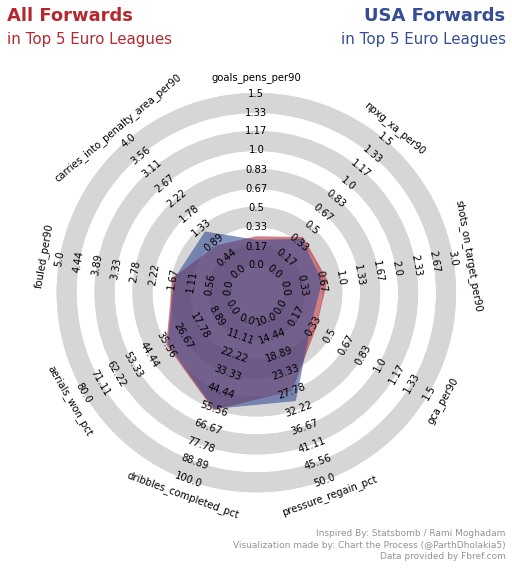

In [35]:
#hide_input
#chart for forwards

params = list(FWradar)

ranges = [(0 , 1.5), #goals_pens_per90
          (0 , 1.5),   #npxg_xa_per90
          (0 , 3), #shots_ontargetper90
          (0, 1.5),  #gca_per90
          (10 , 50),   #pressure regain pct
          (0 , 100),   #dribbles completed pct
          (0 , 80),   #aerials won pct
          (0 , 5), #fouled per 90   
          (0 , 4)]   #carries into penalty area per 90

title = dict(
    title_name='All Forwards ',
    title_color='#B6282F',
    subtitle_name='in Top 5 Euro Leagues',
    subtitle_color='#B6282F',
    title_name_2='USA Forwards',
    title_color_2='#344D94',
    subtitle_name_2='in Top 5 Euro Leagues',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

values1 = FWradar.loc["mean"].tolist()

values2 = USAFWradar.loc["mean"].tolist()

values = [values1 , values2]

radar = Radar(range_fontsize = 10)

endnote = "Visualization made by: Chart the Process (@ParthDholakia5)\nData provided by Fbref.com"

fig, ax = radar.plot_radar(ranges = ranges , params = params , values = values, radar_color = ['#B6282F', '#344D94'] , title = title , endnote = endnote, compare = True)

6 Americans qualify as midfielders in the top 5, which is approximately 1% of all players. They perform well in the following areas:
* Expected goals per 90
* Carrying the ball into the penalty box

However, they're not performing well in the following areas:
* Interceptions
* Completing long passes
* Crosses into the box
* Interceptions (this may be a factor of the American midfielders being attacking midfielders)

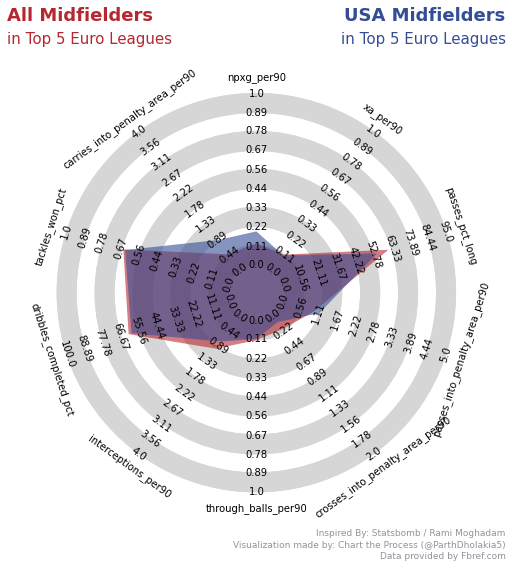

In [55]:
#hide_input
#chart for forwards

params = list(MFradar)

ranges = [(0 , 1), #npxg_per90
          (0 , 1),   #xa_per90
          (0 , 95), #passes_pct_long
          (0, 5),  #passes_into_penalty_area_per90
          (0 , 2),   #crosses_into_penalty_area_per90
          (0 , 1),   #through_balls_per90
          (0 , 4),   #interceptions_per90
          (0 , 100), #dribbles_completed_pct
          (0 , 1),   #tackles_won_pct
          (0 , 4) #carries_into_penalty_area_per90
         ]   

title = dict(
    title_name='All Midfielders',
    title_color='#B6282F',
    subtitle_name='in Top 5 Euro Leagues',
    subtitle_color='#B6282F',
    title_name_2='USA Midfielders',
    title_color_2='#344D94',
    subtitle_name_2='in Top 5 Euro Leagues',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

values1 = MFradar.loc["mean"].tolist()

values2 = USAMFradar.loc["mean"].tolist()

values = [values1 , values2]

radar = Radar(range_fontsize = 10)

endnote = "Visualization made by: Chart the Process (@ParthDholakia5)\nData provided by Fbref.com"

fig, ax = radar.plot_radar(ranges = ranges , params = params , values = values, radar_color = ['#B6282F', '#344D94'] , title = title , endnote = endnote, compare = True)

There are only 4 American defenders that qualify, and they perform well in carrying the ball forward and passing the ball into the penalty area. 

However, they get dispossesed more often and block less shots than most defenders in the top 5. 

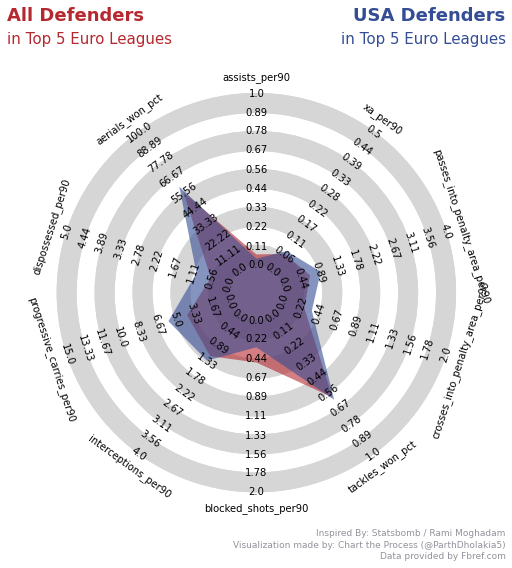

In [74]:
#hide_input
#chart for forwards

params = list(DFradar)

ranges = [(0 , 1), #assists_per90
          (0 , .5),   #xa_per90
          (0 , 4), #passes_into_penalty_area_per90
          (0, 2),  #crosses_into_penalty_area_per90
          (0 , 1),   #tackles_won_pct
          (0 , 2),   #blocked_shots_per90
          (0 , 4),   #interceptions_per90
          (0 , 15), #progressive_carries_per90
          (0 , 5),   #dispossessed_per90
          (0 , 100) #aerials_won_pct
         ]  

title = dict(
    title_name='All Defenders',
    title_color='#B6282F',
    subtitle_name='in Top 5 Euro Leagues',
    subtitle_color='#B6282F',
    title_name_2='USA Defenders',
    title_color_2='#344D94',
    subtitle_name_2='in Top 5 Euro Leagues',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

values1 = DFradar.loc["mean"].tolist()

values2 = USADFradar.loc["mean"].tolist()

values = [values1 , values2]

radar = Radar(range_fontsize = 10)

endnote = "Visualization made by: Chart the Process (@ParthDholakia5)\nData provided by Fbref.com"

fig, ax = radar.plot_radar(ranges = ranges , params = params , values = values, radar_color = ['#B6282F', '#344D94'] , title = title , endnote = endnote, compare = True)

Thank you for making it this far! Please give me a follow on Twitter if you like the work - always looking for feedback and ideas for improvement. 